In [38]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [39]:
### training dataset ###
train_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151219.txt", sep = "\t", header = None)
train_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

# slice dataset up to attack flag column, drop additional features
train_data = train_data.loc[:, :'attack_flag']

# drop software markers
train_data = train_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
train_data["attack_flag"].value_counts()

-1    149915
 1     67713
Name: attack_flag, dtype: int64

In [40]:
### testing dataset ###
test_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151226.txt", sep = "\t", header = None)
test_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

# slice dataset up to attack flag column, drop additional features
test_data = test_data.loc[:, :'attack_flag']

# drop software markers
test_data = test_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_data["attack_flag"].value_counts()

-1    317507
 1     34313
Name: attack_flag, dtype: int64

In [41]:
train_data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,-1
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,-1
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1


In [42]:
train_data.shape

(217628, 15)

In [43]:
train_data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,-0.377718
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.925923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 15 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 24.9+ MB


In [45]:
train_data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [46]:
train_data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [47]:
### training dataset hot one encoding ###

# hot one encoding for service
train_data = pd.concat([train_data, pd.get_dummies(train_data["service"], prefix="is")], axis=1)
train_data.tail(10)

# hot one encoding for proto - commented due to reduced column number
# data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
# data.tail(10)

# hot one encoding for conn state
train_data = pd.concat([train_data, pd.get_dummies(train_data["Conn state"], prefix="state")], axis=1)
train_data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
### testing dataset hot one encoding ###

# hot one encoding for service
test_data = pd.concat([test_data, pd.get_dummies(test_data["service"], prefix="is")], axis=1)
test_data.tail(10)

# hot one encoding for proto - commented due to reduced column number
# data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
# data.tail(10)

# hot one encoding for conn state
test_data = pd.concat([test_data, pd.get_dummies(test_data["Conn state"], prefix="state")], axis=1)
test_data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_OTH,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SHR
351810,0.000000,other,0,0,0,0.00,0.0,1.0,4,13,...,0,0,0,0,0,0,1,0,0,0
351811,0.997128,other,0,0,1,1.00,1.0,1.0,5,14,...,0,0,0,0,0,0,1,0,0,0
351812,0.000000,other,0,0,0,0.00,0.0,1.0,0,1,...,0,0,0,0,0,0,1,0,0,0
351813,0.000000,dns,0,0,0,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
351814,0.000000,dns,0,0,1,1.00,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
351815,0.000000,other,0,0,2,0.00,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
351816,0.000000,other,0,0,3,0.33,1.0,1.0,1,1,...,0,0,0,0,0,0,1,0,0,0
351817,0.000000,other,0,0,4,0.50,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
351818,0.000000,snmp,0,0,5,0.00,1.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
351819,0.000000,other,0,0,0,0.00,0.0,1.0,3,3,...,0,0,0,0,0,0,1,0,0,0


In [49]:
train_data.shape

(217628, 36)

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 36 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
is_dhcp                        217628 non-null uint8
is_dns                   

In [51]:
# check differences between datasets after hot one encoding

train_data.columns.difference(test_data.columns)
# print(train_data.columns.difference(test_data.columns)[0])
for c in train_data.columns.difference(test_data.columns):
    test_data[c] = 0
for c in test_data.columns.difference(train_data.columns):
    train_data[c] = 0


## Data visualization

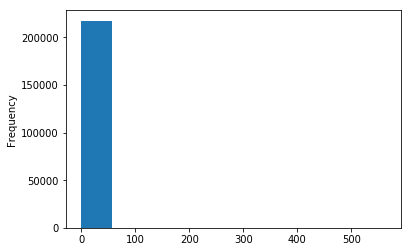

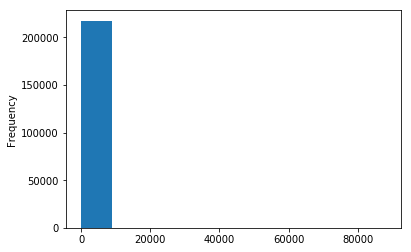

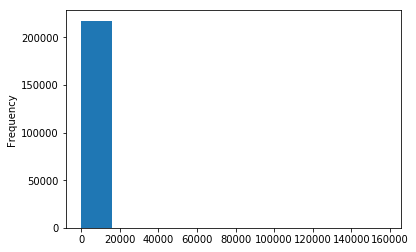

In [52]:
# hisotgrams
# data[data.column > 1000]
train_data['conn len'].plot('hist')
plt.show()
train_data['src bytes'].plot('hist')
plt.show()
train_data['dst bytes'].plot('hist')
plt.show()

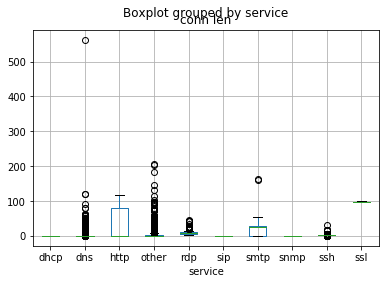

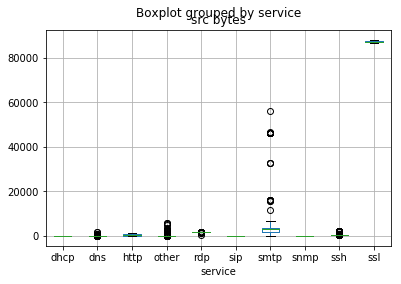

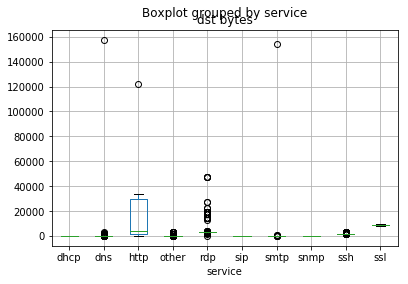

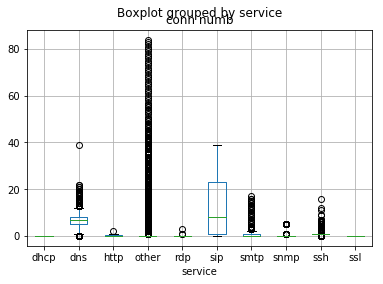

In [53]:
# boxplots
train_data.boxplot(column='conn len', by='service')
train_data.boxplot(column='src bytes', by='service')
train_data.boxplot(column='dst bytes', by='service')
train_data.boxplot(column='conn numb', by='service')

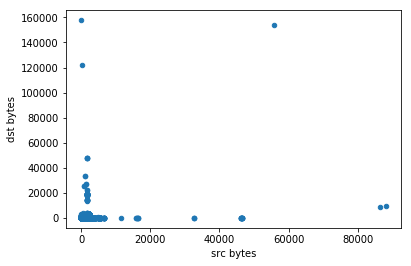

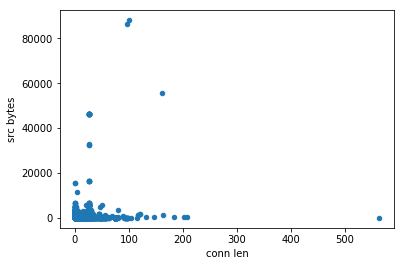

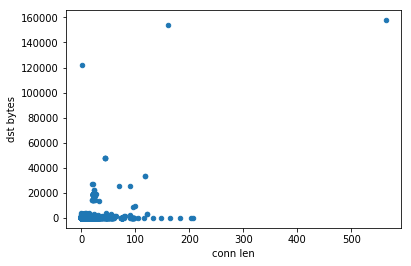

In [54]:
# scatter plots
train_data.plot.scatter(x='src bytes', y= 'dst bytes')
train_data.plot.scatter(x='conn len', y= 'src bytes')
train_data.plot.scatter(x='conn len', y= 'dst bytes')

In [55]:
### training dataset - drop categorical columns ####

train_data = train_data.drop(["service", "Conn state"], axis=1)

In [56]:
### testing dataset - drop categorical columns ####

test_data = test_data.drop(["service", "Conn state"], axis=1)

## First experiments with algorithms

In [57]:
train_data.shape

(217628, 34)

In [58]:
### training dataset - make the dataset binary one ###
train_data.loc[:, "attack_flag"] = train_data.loc[:,"attack_flag"].replace(-2, -1)
train_data.loc[:, "attack_flag"] = train_data.loc[:, "attack_flag"] * -1

In [59]:
### testing dataset - make the dataset binary one ###
test_data.loc[:, "attack_flag"] = test_data.loc[:,"attack_flag"].replace(-2, -1)
test_data.loc[:, "attack_flag"] = test_data.loc[:, "attack_flag"] * -1

In [60]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(4, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

sampled_train_data = train_data.sample(n=10000, random_state=1)
sampled_test_data = test_data.sample(n=10000, random_state=1)

X = sampled_train_data.loc[:, sampled_train_data.columns != 'attack_flag']
y = sampled_train_data.loc[:, sampled_train_data.columns == 'attack_flag'].values.ravel()
X_train, a, y_train, b = train_test_split(X, y, test_size=0.3)

X = sampled_test_data.loc[:, sampled_test_data.columns != 'attack_flag']
y = sampled_test_data.loc[:, sampled_test_data.columns == 'attack_flag'].values.ravel()
a, X_test, b, y_test = train_test_split(X, y, test_size=0.3)

seed = 12

print(Counter(y_test))
print(Counter(y_train))

# wykres po num_trees od 2-40 co 2 dla przykładu

num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=num_trees, random_state=seed),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))



Counter({1: 2716, -1: 284})
Counter({1: 4864, -1: 2136})
Algorithm: AdaBoost     Accuracy: 0.68800, F1-score: 0.81362, Precision: 0.88595, Recall: 0.75221, FPR: 0.92606
TN:  21; FP: 263; FN:  673; TP: 2043

Algorithm: DecisionTree Accuracy: 0.77033, F1-score: 0.86477, Precision: 0.92602, Recall: 0.81112, FPR: 0.61972
TN: 108; FP: 176; FN:  513; TP: 2203

Algorithm: NaiveBayes   Accuracy: 0.64900, F1-score: 0.76149, Precision: 0.98941, Recall: 0.61892, FPR: 0.06338
TN: 266; FP:  18; FN: 1035; TP: 1681

Algorithm: RandomTree   Accuracy: 0.64733, F1-score: 0.76352, Precision: 0.97156, Recall: 0.62887, FPR: 0.17606
TN: 234; FP:  50; FN: 1008; TP: 1708

Algorithm: RandomForest Accuracy: 0.64033, F1-score: 0.76006, Precision: 0.95957, Recall: 0.62923, FPR: 0.25352
TN: 212; FP:  72; FN: 1007; TP: 1709



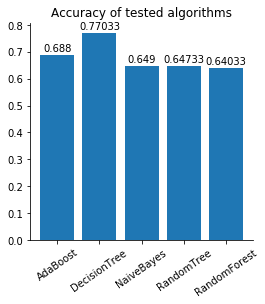

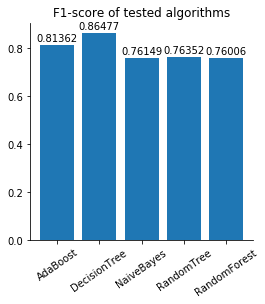

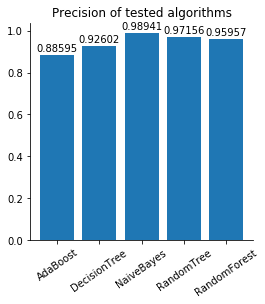

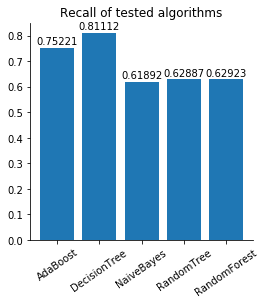

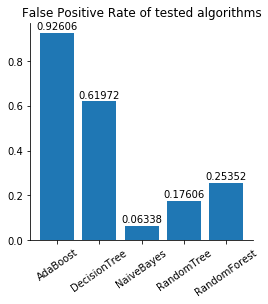

In [62]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")